<a href="https://colab.research.google.com/github/205410110/107-2-Multimedia/blob/master/Keras_Mnist_MLP_h256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(units=256,
  input_dim=784,
  kernel_initializer='normal',
  activation='relu'))

model.add(Dense(units=10,
  kernel_initializer='normal',
  activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=x_Train_normalize,
  y=y_Train_OneHot,validation_split=0.2,
  epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9401
Epoch 2/10
 - 2s - loss: 0.1916 - acc: 0.9451 - val_loss: 0.1558 - val_acc: 0.9553
Epoch 3/10
 - 2s - loss: 0.1357 - acc: 0.9616 - val_loss: 0.1261 - val_acc: 0.9647
Epoch 4/10
 - 2s - loss: 0.1030 - acc: 0.9703 - val_loss: 0.1126 - val_acc: 0.9676
Epoch 5/10
 - 2s - loss: 0.0812 - acc: 0.9772 - val_loss: 0.0988 - val_acc: 0.9713
Epoch 6/10
 - 2s - loss: 0.0661 - acc: 0.9815 - val_loss: 0.0938 - val_acc: 0.9726
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9850 - val_loss: 0.0905 - val_acc: 0.9741
Epoch 8/10
 - 2s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0827 - val_acc: 0.9767
Epoch 9/10
 - 2s - loss: 0.0381 - acc: 0.9901 - val_loss: 0.0822 - val_acc: 0.9761
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9918 - val_loss: 0.0806 - val_acc: 0.9764


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

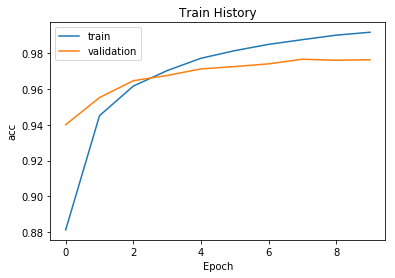

In [6]:
show_train_history(train_history,'acc','val_acc')

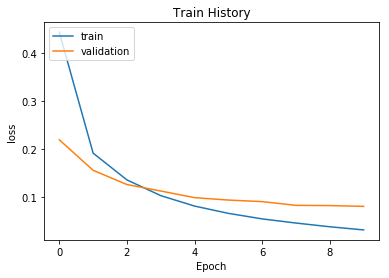

In [7]:
show_train_history(train_history,'loss','val_loss')

In [8]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 37us/step

accuracy= 0.9761


In [9]:
prediction=model.predict_classes(x_Test)

prediction

array([7, 2, 1, ..., 4, 5, 6])

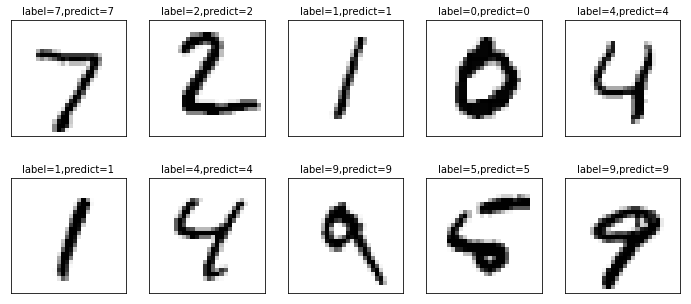

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
    idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    title= "label=" +str(labels[idx])
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
      
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
  
plot_images_labels_prediction(x_test_image,y_test_label,
  prediction,idx=0)

In [11]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1011,1,1,0,2,4,8,0
3,0,0,4,991,0,1,0,3,6,5
4,1,0,5,1,960,0,3,0,2,10
5,3,0,0,17,1,853,7,1,7,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,12,7,1,0,0,989,5,9
8,4,0,3,5,1,1,2,2,955,1


In [12]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [13]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


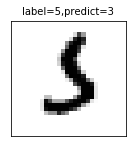

In [14]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=340,num=1)

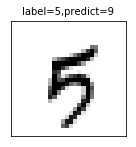

In [15]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=1289,num=1)